# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [53]:
import pandas as pd
df = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [54]:
import requests
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
if response.status_code == 200:
    with open("image-predictions.tsv", "wb") as file:
        file.write(response.content)
else:
   print("Connection error")

In [55]:
df_image=pd.read_csv("image-predictions.tsv",sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [56]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [57]:
import pandas as pd
import json

tweets = []

with open('tweet-json.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Load the JSON data from the line
        tweet_data = json.loads(line)
        
        # Extract the required information (tweet ID, retweet count, and favorite count)
        tweet_id = tweet_data['id']
        retweet_count = tweet_data['retweet_count']
        favorite_count = tweet_data['favorite_count']
        
        # Append the extracted data to the 'tweets' list
        tweets.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

# Create a pandas DataFrame from the 'tweets' list
df_info = pd.DataFrame(tweets)


In [58]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Firstly, we look into the "twitter-archive-enhanced.csv" dataset

In [59]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [61]:
df['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
an              7
Bailey          7
Daisy           7
Buddy           7
Toby            7
Koda            6
Dave            6
Jack            6
Leo             6
Bella           6
Jax             6
Milo            6
Rusty           6
Oscar           6
Scout           6
Stanley         6
Larry           5
             ... 
Ralph           1
Chuck           1
Kody            1
Bayley          1
Eazy            1
Divine          1
Mason           1
Philippe        1
Puff            1
Charleson       1
Kollin          1
Toffee          1
Molly           1
Tanner          1
Amy             1
Rhino           1
Tonks           1
Al              1
Florence        1
Tobi            1
Siba            1
Bauer           1
Ferg            1
Staniel         1
Sparky    

In [62]:
df["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [63]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [64]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
df_image['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
beagle                        18
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [66]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
## WeRateDogs Twitter archive data
1. Since we only want the original tweets, reply tweets and retweets need to be removed

2. The timestamp columns is currently stored as an object (string) data type.

3. The source column contains HTML tags.

4. The name column has inacurrate names such as "None", "a","an" 

5. Some rows that have two dog staging values. There could be an inconsistency or ambiguity in the classification of the dog's stage for those tweets.

##  Tweet image prediction

6. The dog breed names appear to have inconsistent capitalization

7. Some breed names include underscores ("Labrador_retriever," "Chesapeake_Bay_retriever"), while others use spaces ("German shepherd," "Chihuahua")

8. p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog is redundant

### Tidiness issues
1. Three dataframes can be consolidated into one

2. doggo, floofer, pupper and puppo columns are unnecessary 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [67]:
# Make copies of original pieces of data
df_clean = df.copy()
df_image_clean = df_image.copy()
df_info_clean = df_info.copy()

### Issue #1: The timestamp columns is currently stored as an object (string) data type.

#### Define: 

Change the datatype of timestamp column to datetime

#### Code

In [68]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [69]:
print(df_clean.dtypes)

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object


### Issue #2: Since we only want the original tweets, reply tweets and retweets need to be removed

#### Define: 

We will drop the columns that have to do with retweets and replies doesn't remove the retweets from the data

#### Code

In [70]:
# To remove the retweets
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
# To remove the replies
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

# To drop the reply and retweet columns
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace=True)


#### Test

In [71]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3: The 'source' column contains HTML tags.

#### Define: 

We can extract the values to get the needed information in the HTML tags

#### Code

In [72]:
df_clean['source'] = df_clean['source'].str.extract('>(.*?)<')

In [73]:
df_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4: The 'name' column has unconsistent names such as "None", "a","an"

#### Define: 

Replace all those names by "Nan"

#### Code

In [74]:
import numpy as np
# Replace remaining inaccurate names with NaN
inaccurate_names = ['a', 'an','None']
df_clean['name'] = df_clean['name'].replace(inaccurate_names, np.nan)

In [75]:
(df_clean['name'].isin(inaccurate_names)).sum()

0

### Issue #6: doggo, floofer, pupper and puppo columns are unnecessary

#### Define

We will combine all those columns into one named "dog_stage"

#### Code

In [76]:
# Create a function to combine the dog stages
def combine_stages(row):
    stages = []
    if row['doggo'] == 'doggo':
        stages.append('doggo')
    if row['floofer'] == 'floofer':
        stages.append('floofer')
    if row['pupper'] == 'pupper':
        stages.append('pupper')
    if row['puppo'] == 'puppo':
        stages.append('puppo')
    if len(stages) == 0:
        return 'None'
    else:
        return ' '.join(stages)

# Apply the function to create the 'dog_stage' column
df_clean['dog_stage'] = df_clean.apply(combine_stages, axis=1)

# Drop the individual stage columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace=True)



In [77]:
df_clean['dog_stage'].value_counts()

None             1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo pupper        9
doggo puppo         1
doggo floofer       1
Name: dog_stage, dtype: int64

### Issue #7: p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog is redundant

#### Define: 

We will get the highest probability with its predicted dog breed only

#### Code

In [78]:
import numpy as np
conditions = [
    (df_image_clean['p1_dog'] == True),
    (df_image_clean['p2_dog'] == True),
    (df_image_clean['p3_dog'] == True)
]
choices_p = [df_image_clean['p1'], df_image_clean['p2'], df_image_clean['p3']]
choices_p_conf = [df_image_clean['p1_conf'], df_image_clean['p2_conf'], df_image_clean['p3_conf']]

df_image_clean['p'] = np.select(conditions, choices_p, default=np.nan)
df_image_clean['p_conf'] = np.select(conditions, choices_p_conf, default=np.nan)

df_image_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1,inplace=True)

#### Test

In [79]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p           1751 non-null object
p_conf      1751 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


### Issue #8: Some breed names include underscores ("Labrador_retriever," "Chesapeake_Bay_retriever"), while others use spaces ("German shepherd," "Chihuahua")

#### Define: 

We will replace '_' by a space

#### Code

In [80]:
# Clean the breed names
df_image_clean['p'] = df_image_clean['p'].str.replace('_', ' ')

#### Test

In [81]:
df_image_clean['p'].value_counts()

golden retriever                  173
Labrador retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker spaniel                     34
French bulldog                     32
Chesapeake Bay retriever           31
miniature pinscher                 26
Cardigan                           23
Staffordshire bullterrier          22
Eskimo dog                         22
beagle                             21
German shepherd                    21
Siberian husky                     20
Shih-Tzu                           20
Shetland sheepdog                  19
Lakeland terrier                   19
kuvasz                             19
Maltese dog                        19
Rottweiler                         19
basset      

### Issue #9: The dog breed names appear to have inconsistent capitalization

#### Define: 

We will capitalize the first letter of a word

#### Code

In [82]:
# Clean the breed names
df_image_clean['p'] = df_image_clean['p'].str.title()

#### Test

In [83]:
df_image_clean['p'].value_counts()

Golden Retriever                  173
Labrador Retriever                113
Pembroke                           96
Chihuahua                          95
Pug                                65
Toy Poodle                         52
Chow                               51
Samoyed                            46
Pomeranian                         42
Cocker Spaniel                     34
Malamute                           34
French Bulldog                     32
Chesapeake Bay Retriever           31
Miniature Pinscher                 26
Cardigan                           23
Staffordshire Bullterrier          22
Eskimo Dog                         22
Beagle                             21
German Shepherd                    21
Siberian Husky                     20
Shih-Tzu                           20
Lakeland Terrier                   19
Shetland Sheepdog                  19
Maltese Dog                        19
Rottweiler                         19
Kuvasz                             19
Basset      

### Issue #10: Three dataframes can be consolidated into one

#### Define: 

1. Find the common columns:

 - Get the column names of both dataframes.
    
 - Find the common columns by taking the intersection of the column names.
    
2. Merge the dataframes:

 - Use the common columns as the merging key.
    
 - Choose the appropriate merge method (e.g., inner, outer, left, or right) based on your data requirements.

#### Code

In [84]:
columns_df1 = df_clean.columns
columns_df2 = df_image_clean.columns

# Find the common columns
common_columns = list(set(columns_df1) & set(columns_df2))

# Merge the dataframes based on the common columns
df_clean = pd.merge(df_clean, df_image_clean, on=common_columns, how='inner')
df_clean = pd.merge(df_clean, df_info_clean, on=common_columns, how='inner')

#### Test

In [85]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p,p_conf,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,42908,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,41048,9774


### Issue #11: Some rows that have two dog staging values. There could be an inconsistency or ambiguity in the classification of the dog's stage for those tweets.

#### Define: 

- Find all the conflicted value in 'dog_stage' column
- Show the images of the dog to decide what we should replace those values

#### Code

In [86]:
#Find the conflicted values
df_clean['dog_stage'].value_counts()

None             1668
pupper            201
doggo              63
puppo              22
doggo pupper        8
floofer             7
doggo puppo         1
doggo floofer       1
Name: dog_stage, dtype: int64

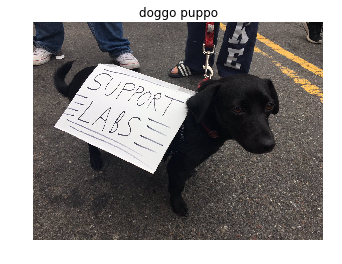

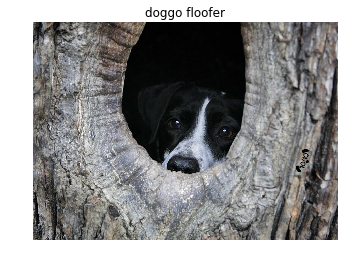

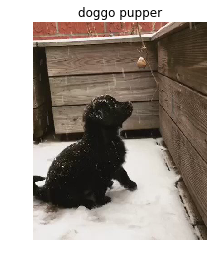

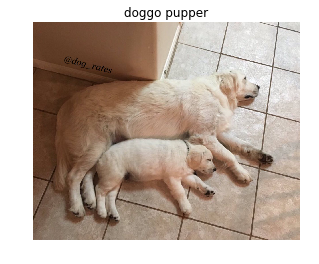

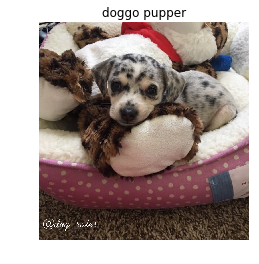

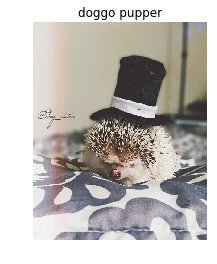

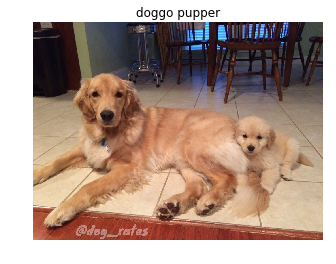

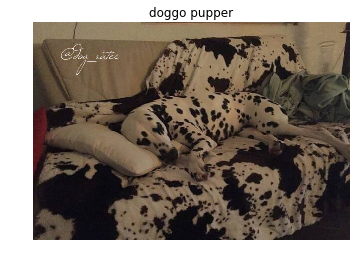

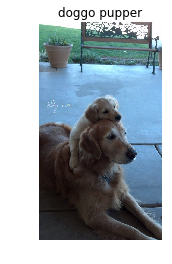

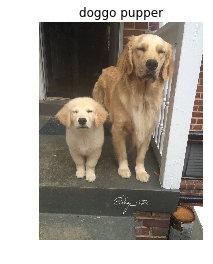

In [87]:
#Show images of dogs to clean the dog_stage column
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
import io


# Filter the DataFrame for the specific dog stages
filtered_dogs = df_clean[df_clean['dog_stage'].isin(['doggo pupper', 'doggo puppo', 'doggo floofer'])]

# Iterate over each row in the filtered DataFrame
for index, row in filtered_dogs.iterrows():
    # Get the image URL and dog stage for the current row
    image_url = row['jpg_url']
    dog_stage = row['dog_stage']
    
     # Download the image from the URL
    image_data = urllib.request.urlopen(image_url).read()
    
    # Read the image data using PIL
    image = Image.open(io.BytesIO(image_data))
    
    # Display the image with the dog stage as the title
    plt.imshow(image)
    plt.title(dog_stage)
    plt.axis('off')
    plt.show()

After observing the photos, we can see that there's a photo that doesn't have any dog, and there're photos that have two or more dogs, which makes us hard to define correctly the stage of the dog. Therefore, we will replace all the conflicted values by "None"

In [88]:
df_clean['dog_stage'] = df_clean['dog_stage'].replace(['doggo pupper', 'doggo puppo', 'doggo floofer'], 'None')

#### Test

In [89]:
df_clean['dog_stage'].value_counts()

None       1678
pupper      201
doggo        63
puppo        22
floofer       7
Name: dog_stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [90]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1386 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p                     1666 non-null object
p_conf                1666 non-null float64
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(7)
memory usage: 246.4+ KB


In [92]:
# Count the occurrences of each breed
breed_counts = df_clean['p'].value_counts()

# Print the top 10 most common breeds
top_10_breeds = breed_counts.head(10)
print(top_10_breeds)

Golden Retriever      156
Labrador Retriever    106
Pembroke               94
Chihuahua              90
Pug                    62
Toy Poodle             50
Chow                   48
Samoyed                42
Pomeranian             41
Malamute               33
Name: p, dtype: int64


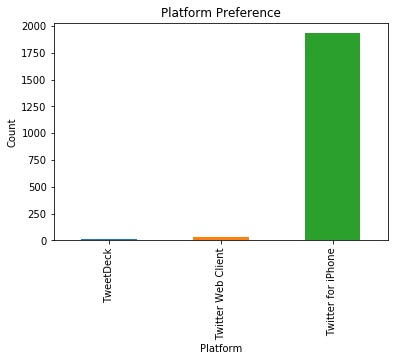

In [93]:
# Group the data based on 'source' column and calculate the count
platform_counts = df_clean.groupby('source').size()

# Plot the bar chart
platform_counts.plot(kind='bar')
plt.title('Platform Preference')
plt.xlabel('Platform')
plt.ylabel('Count')

# Show the bar chart
plt.show()

In [94]:
average_favorite_count = df_clean['favorite_count'].mean()
average_retweet_count = df_clean['retweet_count'].mean()

print("Average Favorite Count:", average_favorite_count)
print("Average Retweet Count:", average_retweet_count)

Average Favorite Count: 8949.1065449
Average Retweet Count: 2784.44951801


### Insights:
1. Top 10 most common dog breeds: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug, Toy Poodle, Chow, Samoyed, Pomeranian, Malamute

2. People tend to prefer posting on their iPhones to every other platforms

3. The engagement metrics: The average favorite count is approximately 8,949, while the average retweet count is around 2,784. This indicates that, on average, the tweets in your dataset receive a higher number of favorites compared to retweets. It suggests that users tend to show their appreciation for the tweets by liking them more often than sharing them.

### Visualization

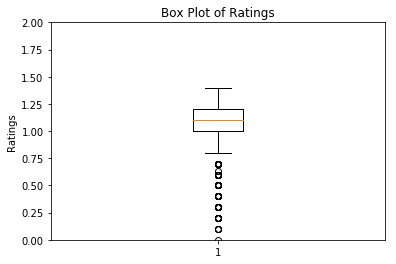

In [95]:
import matplotlib.pyplot as plt

# Calculate the rating
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

# Plot the histogram
plt.boxplot(df_clean['rating'])
plt.title('Box Plot of Ratings')
plt.ylabel('Ratings')

plt.ylim(0,2)

# Show the histogram
plt.show()

From the box plot, we can see that on average, people mostly love their dogs although their are still some low ratings